## One-way ANOVA between subjects

### 1. Importing the libraries
First, let us set the environment by importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### 2. Data visualization and descriptive statistics: An example
Without doubt, the COVID pandemic will have severe long-lasting effects on our societies. Although initial research focused on epidemiological aspects, current studies address the psychological effects of the pandemic. In this hypothetical example, we want to assess whether the **type of lockdown** influences the perception of **life satisfaction**. 

Lockdown types are defined in regard to the behavioral restrictions implemented by governments. As such, we will have **one** independent variable (lockdown type) with three levels (mild, moderate and extreme) and **one** dependent variable on an interval scale (life satisfaction) ranging from 0 to 100.


The data frame named "lock_data" contains life satisfaction scores from 90 participants Please read the data using `read_csv()` and use the function `head()` to explore it.

In [2]:
# Read the CSV file using a relative path
lock_data = pd.read_csv("../ANOVA_and_ANCOVA/Datasets/lock_data.csv")

# Display the first few rows of the dataframe
print(lock_data.head())

   id lockdown_type sex  life_satisfaction
0   1          mild   m          44.113647
1   2          mild   f          12.819376
2   3          mild   f          54.679811
3   4          mild   m          23.397983
4   5          mild   m          71.267360


Try to relate this example to the content you covered in the last theoretical seminar session. What kind of independent variable are we dealing with? Between-subjects or within-subjects?

Now, let us explore the data using `describe()` to show the means and other descriptive statistics.

In [3]:
# Get a summary of statistics
summary = lock_data.describe()

# Display the summary
print(summary)

              id  life_satisfaction
count  90.000000          90.000000
mean   45.500000          45.783873
std    26.124701          23.312849
min     1.000000           1.591166
25%    23.250000          28.580012
50%    45.500000          45.802662
75%    67.750000          64.888950
max    90.000000          92.918149


Boxplots provide an overview of the data distribution and some intuition as to the results we might expect. In addition, boxplots enable us to identify potential outliers, which should be removed as part of a preprocessing (data cleaning) step prior to data analysis. The following code chunk illustrates code for creating boxplots using `boxplot()`. Run it to see what happens.

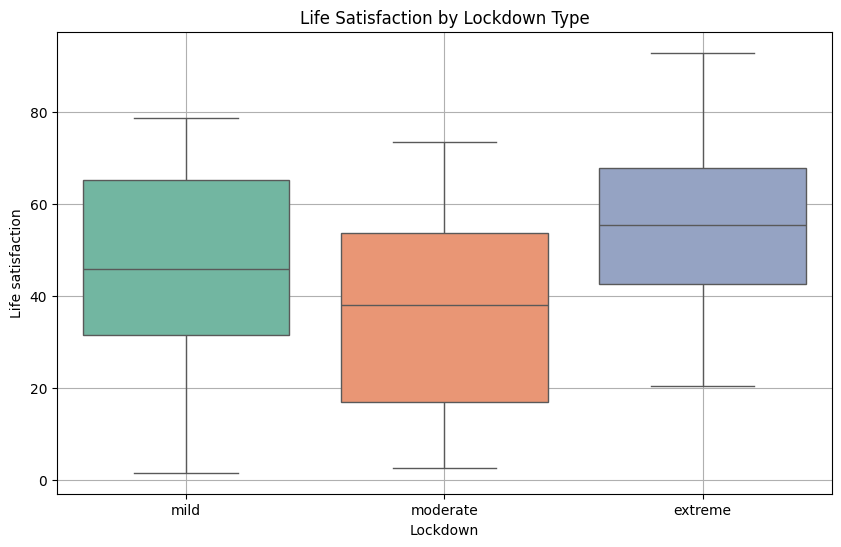

In [4]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=lock_data, x='lockdown_type', y='life_satisfaction', palette='Set2')

# Customize the plot
plt.xlabel("Lockdown")
plt.ylabel("Life satisfaction")
plt.title("Life Satisfaction by Lockdown Type")
plt.grid(True)

# Show the plot
plt.show()

### 3. Assumptions
ANOVA is a parametric model. This means that its usage requires the data to fulfill a series of assumptions. If the data does not satisfy those assumptions, a non-parametric test is recommended. However, ANOVA can be used in case of slight violations of these assumptions. 

Testing whether the data meets the assumptions of parametric testing is a complex endeavor, especially considering that different ANOVA models require different assumption tests (e.g., normality, homogeneity of variance, sphericity, etc). We hope that you remember them from your Bachelor studies. Because this is not a Bachelor level course, we should not spend too much time on ANOVA methodology. Therefore, we will not cover assumption tests in this tutorial. The aim here is to briefly recap to build upon this simple methodology with new knowledge on multivariate modeling techniques (which perform better as compared with ANOVA when aiming to measure change due to an intervention). But please keep the necessity of assumption-tests for ANOVA in mind. 

### 4. ANOVA

Provided that the assumptions are met, we can proceed to perform the analysis of variance (ANOVA), by using the `anova()` function from the `pingouin` package. Within the function, dependent and independent variables, as well as the data frame must be specified:

In [5]:
# Perform ANOVA
anova1 = pg.anova(dv='life_satisfaction', between='lockdown_type', data=lock_data, detailed=True)

# Display the ANOVA results
print(anova1)

          Source            SS  DF           MS         F     p-unc       np2
0  lockdown_type   4670.013748   2  2335.006874  4.648587  0.012075  0.096547
1         Within  43700.501505  87   502.304615       NaN       NaN       NaN


### 5. Interpretation
The test statistic used in the context of ANOVA is the F-statistic (you probably remember it from regression analysis). In the context of a one-way ANOVA, this is the result of dividing the mean sum of squares provided in the output (2335.0) by the mean squared residual (502.3). Its probability is obtained when contrasting this value to its probability distribution. In essence, it quantifies how much variance a model explains (systematic), relative to the unexplained (unsystematic variance). Thus, we frequently - but not always - hope to obtain larger F-statistic values. 

### 6. Simple linear regression with categorical variables (Exercise 1)

Remember that ANOVA is a special case of the general linear model. Use the following code chunk to run a simple linear regression model using the *ols()* function and then explore the results with the *summary()* function.

In [6]:
# Perform linear regression
model = ols('life_satisfaction ~ lockdown_type', data=lock_data).fit()

# Display the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      life_satisfaction   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     4.649
Date:                Tue, 01 Apr 2025   Prob (F-statistic):             0.0121
Time:                        09:35:36   Log-Likelihood:                -406.04
No. Observations:                  90   AIC:                             818.1
Df Residuals:                      87   BIC:                             825.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### 7. Post hoc Analysis
Remember that ANOVA tests for all differences among conditions. It is an "omnibus" test. That is, a significant result will inform you about a significant difference but the precise "location" of the difference remains unknown. There are two options to identify which conditions differ significantly. Is moderate lock-down different in terms of life satisfaction from mild lock-down, or does only extreme lock-down differ from mild lock-down in terms of life satisfaction? One could use planned contrasts or conduct a post hoc analysis. In this example, we will perform a post hoc analysis:

`pairwise_tukeyhsd` (Honest Significant Difference) allows for the identification of significant differences in pairwise comparisons by estimating an adjusted p-value. Note that this is only one of several ways in which post hoc analysis can be performed. Different methods and corresponding functions will have advantages and disadvantages and therefore be more suited for particular situations.

In [5]:
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=lock_data['life_satisfaction'], groups=lock_data['lockdown_type'], alpha=0.95)

# Display the results of Tukey's HSD test
print("\nTukey's HSD test results:")
print(tukey)


Tukey's HSD test results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.95   
 group1  group2  meandiff p-adj   lower    upper   reject
---------------------------------------------------------
extreme     mild  -9.1327 0.2605 -10.8985  -7.3669   True
extreme moderate  -17.641 0.0085 -19.4068 -15.8752   True
   mild moderate  -8.5083 0.3102  -10.274  -6.7425   True
---------------------------------------------------------


### 8. Interpretation
Please interpret the output. Which groups differ substantially in terms of life satisfaction?